# Modelación de flujo de agua subterránea en un medio homogeneo/Perfil

In [1]:
### Se hace la importación de las librerias de python, además de las librerias básicas para cálculo númerico

from __future__ import print_function
from fenics import *
import numpy as np
import random as ra
import matplotlib.pyplot as plt
import sys

In [2]:
# Se crea la malla donde se define el dominio

mesh= RectangleMesh(Point(0,0),Point(200,100),20,10)
V = FunctionSpace(mesh, 'P', 1)

In [4]:
# Se definen las condiciones de fronteras

def frontera_S(x,frontera):
 tol=1E-14    
 if frontera:
  if abs(x[1]-100)<=tol: 
   return True
  else:
   return False 
 else:
  return False

F_S = DirichletBC(V, Expression('100-0.45*x[0]',degree=1), frontera_S)
bc = [F_S]

In [5]:
#Se define el problema variacional

u=TrialFunction(V)
v=TestFunction(V)
f=Constant(0)
a=dot(grad(u),grad(v))*dx
g=Constant(0)
L=f*v*dx-g*v*ds

In [6]:
# Se realiza el cálculo de la solución

u= Function(V)
solve(a==L,u,bc)

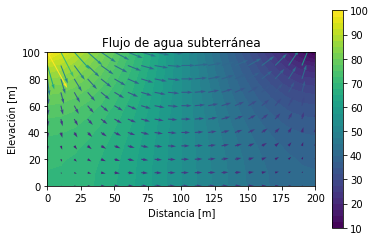

In [7]:
# Ploteo de la solución

plt.figure()
ax= plt.subplot(111)  
im=plot(u)
plt.colorbar(im) 
lo=plot(-grad(u))
plt.title('Flujo de agua subterránea')
plt.ylabel('Elevación [m]')
plt.xlabel('Distancia [m]')
plt.show()